Dataset from: https://github.com/Shen0000/Soccer-Injury-Risk-Prediction/blob/master/assets/json/compiledData.json

In [ ]:
import json
import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving compiledData.json to compiledData.json


In [ ]:
import json

with open("compiledData.json", "r") as file:
    data = json.load(file)

In [ ]:
data

{'Minutes': [3150,
  3240,
  2020,
  2160,
  3420,
  180,
  1397,
  0,
  0,
  2027,
  2341,
  2610,
  2887,
  245,
  1917,
  1800,
  2168,
  22,
  2084,
  3298,
  1955,
  765,
  582,
  2918,
  797,
  2505,
  3412,
  3353,
  98,
  733,
  1873,
  1577,
  0,
  263,
  492,
  1991,
  135,
  44,
  1293,
  0,
  30,
  16,
  26,
  2190,
  3230,
  3403,
  3330,
  3420,
  3201,
  2670,
  23,
  0,
  175,
  2310,
  1328,
  2897,
  607,
  1912,
  61,
  205,
  982,
  1875,
  30,
  404,
  0,
  26,
  2119,
  2498,
  980,
  0,
  0,
  1343,
  1030,
  0,
  75,
  15,
  547,
  456,
  1773,
  168,
  0,
  2926,
  2433,
  3005,
  2191,
  1406,
  2604,
  2109,
  1883,
  1529,
  2750,
  661,
  1780,
  1521,
  2151,
  2042,
  2334,
  3090,
  2377,
  229,
  131,
  131,
  284,
  3062,
  281,
  33,
  235,
  118,
  1033,
  2222,
  1716,
  53,
  0,
  0,
  1710,
  1710,
  3110,
  90,
  450,
  180,
  270,
  1451,
  310,
  0,
  0,
  1710,
  1233,
  2968,
  2592,
  2672,
  1223,
  1396,
  822,
  1179,
  134,
  483,
  2010

In [ ]:
csv_parameters = ['Name', 'Position', 'Appearances', 'Assists', 'Passes', 'Yellow cards', 'Red cards', 'Fouls', 'Tackles']

In [ ]:
for parameter in csv_parameters:
  if parameter not in ['Name', 'Position']:
    for i in range(len(data[parameter])):
      data[parameter][i] = int(data[parameter][i])

In [ ]:
df = pd.DataFrame.from_dict(data)
df

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles
0,3150,1,1,25,0.00,Thibaut Courtois,Goalkeeper,35,0,983,2,0,2,0
1,3240,1,1,24,0.00,Thibaut Courtois,Goalkeeper,36,0,792,1,0,1,0
2,2020,1,1,23,0.00,Thibaut Courtois,Goalkeeper,23,0,523,1,2,2,0
3,2160,1,0,31,1.99,Asmir Begovic,Goalkeeper,24,0,530,0,0,0,0
4,3420,0,0,30,1.99,Asmir Begovic,Goalkeeper,38,0,945,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1490,0,0,28,1.75,Romaine Sawyers,Midfielder,19,0,720,2,0,18,30
3258,1192,1,0,28,1.91,Mbaye Diagne,Forward,16,2,235,2,0,17,4
3259,0,0,0,20,0.00,Cheikh Diaby,Forward,0,0,0,0,0,0,0
3260,0,0,0,21,1.85,Richard Nartey,Defender,0,0,0,0,0,0,0


In [ ]:
df[10:30]

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles
10,2341,0,0,24,1.90,Kurt Zouma,Defender,28,0,2080,6,0,30,23
11,2610,0,1,23,1.90,Kurt Zouma,Defender,32,2,1442,3,1,20,32
12,2887,1,0,22,1.90,Kurt Zouma,Defender,34,0,1021,1,0,19,50
13,245,0,1,21,1.90,Kurt Zouma,Defender,9,1,128,0,0,2,8
14,1917,1,1,20,1.90,Kurt Zouma,Defender,23,1,736,0,0,9,30
15,1800,1,1,34,1.93,Gary Cahill,Defender,20,1,746,3,0,12,13
16,2168,1,1,33,1.93,Gary Cahill,Defender,25,1,1004,1,0,14,15
17,22,1,0,32,1.93,Gary Cahill,Defender,2,0,18,0,0,0,0
18,2084,0,0,31,1.93,Gary Cahill,Defender,27,0,1330,1,1,17,29
19,3298,0,1,30,1.93,Gary Cahill,Defender,37,0,1849,5,0,34,53


In [ ]:
df['Height'].mean

<bound method Series.mean of 0       0.00
1       0.00
2       0.00
3       1.99
4       1.99
        ... 
3257    1.75
3258    1.91
3259    0.00
3260    1.85
3261    1.80
Name: Height, Length: 3262, dtype: float64>

In [ ]:
df.loc[df['Height'] == df['Height'].mean(axis=0)]

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles


In [ ]:
df. loc[df['Injured'] == 1]

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles
0,3150,1,1,25,0.00,Thibaut Courtois,Goalkeeper,35,0,983,2,0,2,0
1,3240,1,1,24,0.00,Thibaut Courtois,Goalkeeper,36,0,792,1,0,1,0
2,2020,1,1,23,0.00,Thibaut Courtois,Goalkeeper,23,0,523,1,2,2,0
3,2160,1,0,31,1.99,Asmir Begovic,Goalkeeper,24,0,530,0,0,0,0
12,2887,1,0,22,1.90,Kurt Zouma,Defender,34,0,1021,1,0,19,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,2363,1,1,23,1.76,Raphinha,Forward,30,9,876,3,0,13,34
3232,1286,1,1,29,1.82,Rodrigo,Forward,26,2,559,3,0,19,14
3236,2563,1,0,22,1.78,Eberechi Eze,Midfielder,34,6,1088,3,0,18,27
3249,2103,1,0,21,1.89,Dara O'Shea,Defender,28,0,810,3,0,13,45


In [ ]:
df['Height'].replace(0.0,df['Height'].mean(axis=0),inplace=True)

In [ ]:
df[322:323]

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles
322,1373,1,1,26,1.75,Theo Walcott,Forward,28,2,310,0,0,3,11


array([[<Axes: title={'center': 'Minutes'}>,
        <Axes: title={'center': 'Injured'}>,
        <Axes: title={'center': 'Recovering'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Appearances'}>],
       [<Axes: title={'center': 'Assists'}>,
        <Axes: title={'center': 'Passes'}>,
        <Axes: title={'center': 'Yellow cards'}>],
       [<Axes: title={'center': 'Red cards'}>,
        <Axes: title={'center': 'Fouls'}>,
        <Axes: title={'center': 'Tackles'}>]], dtype=object)

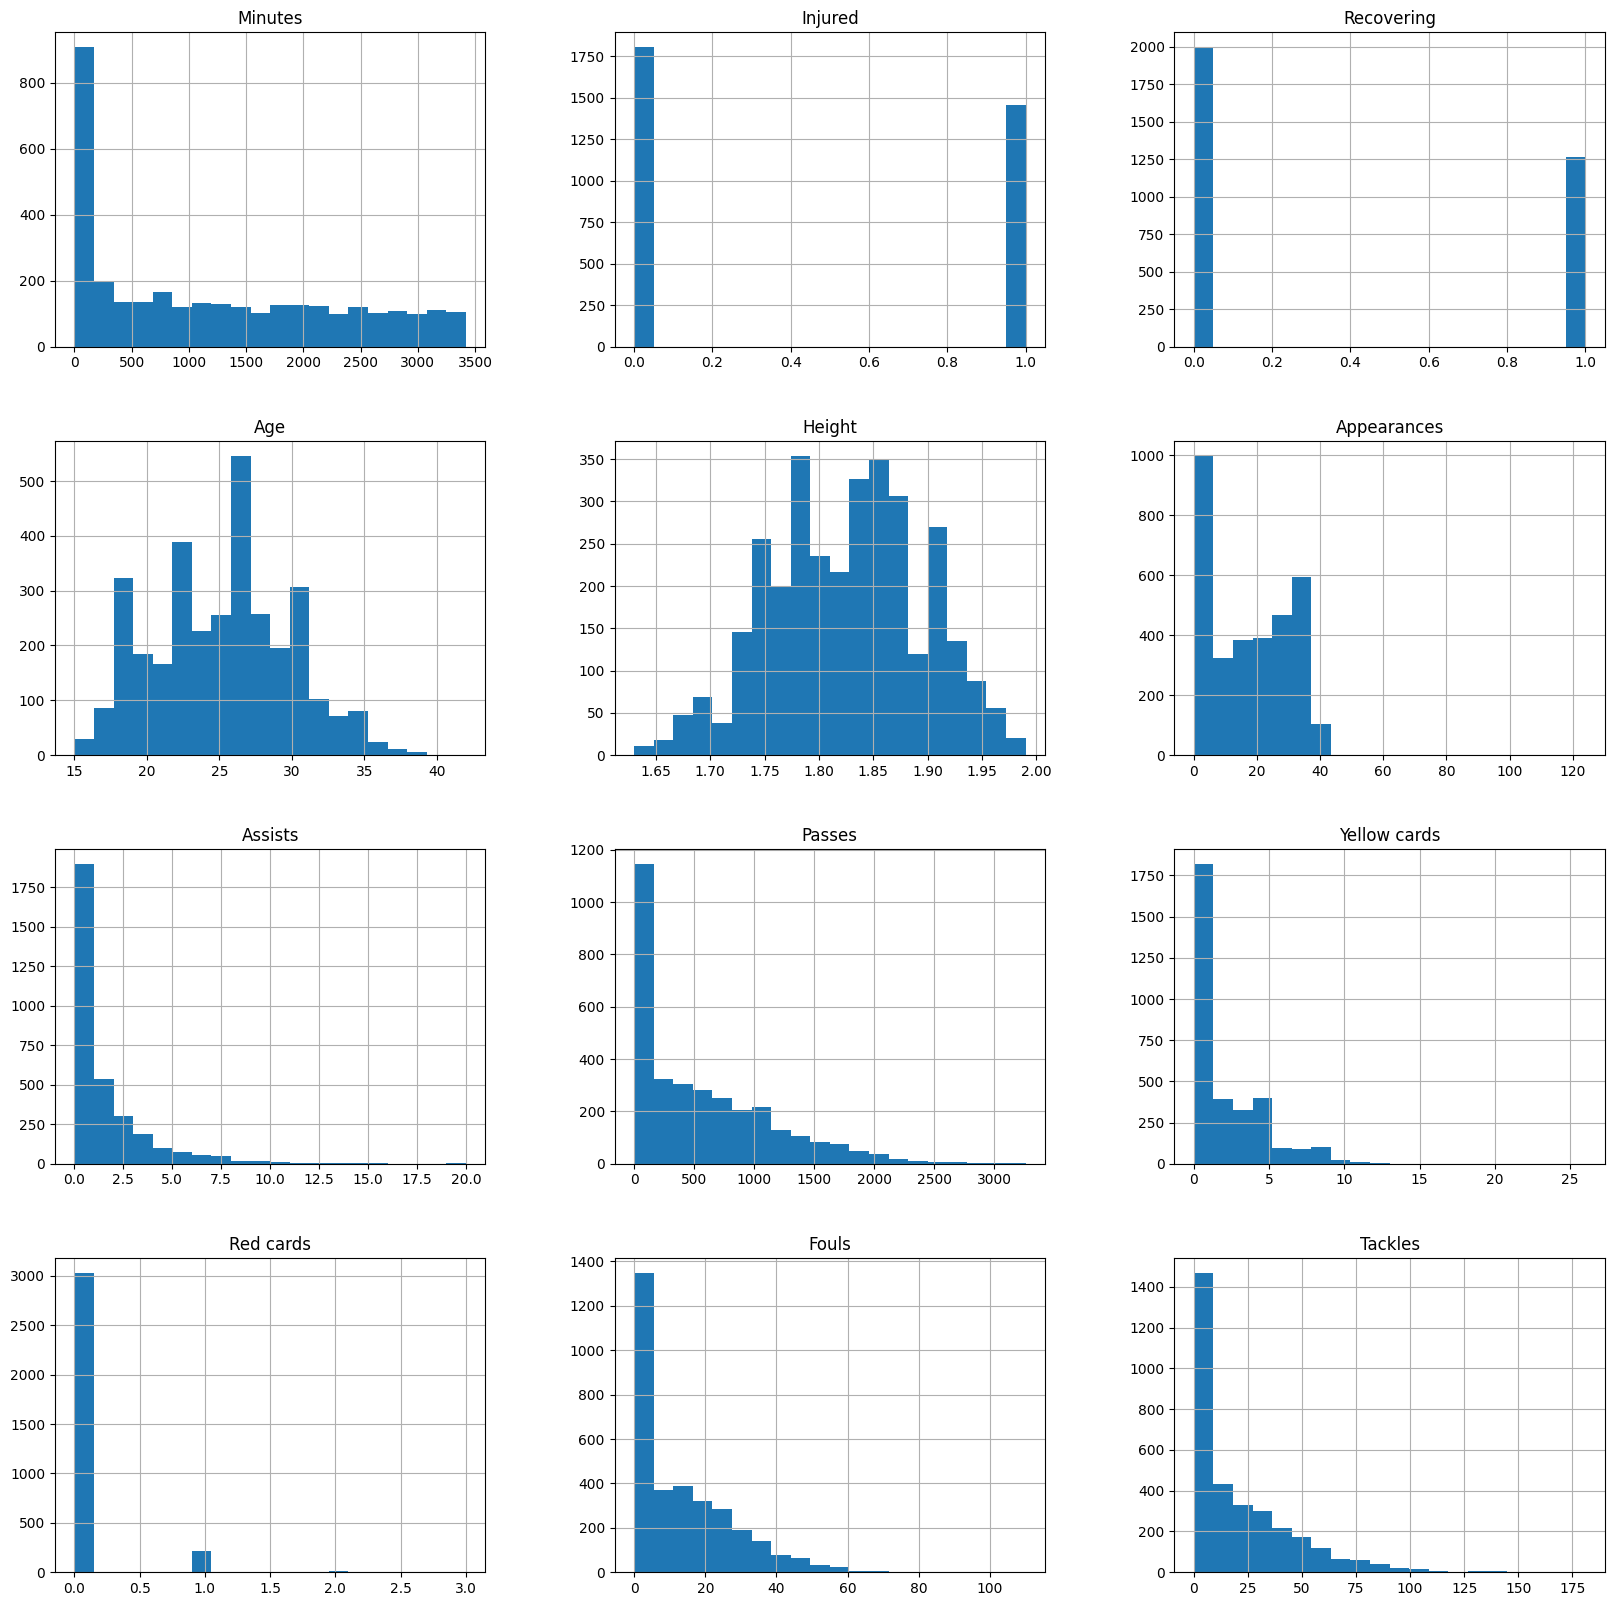

In [ ]:
df.hist(bins=20, figsize=(20,20))

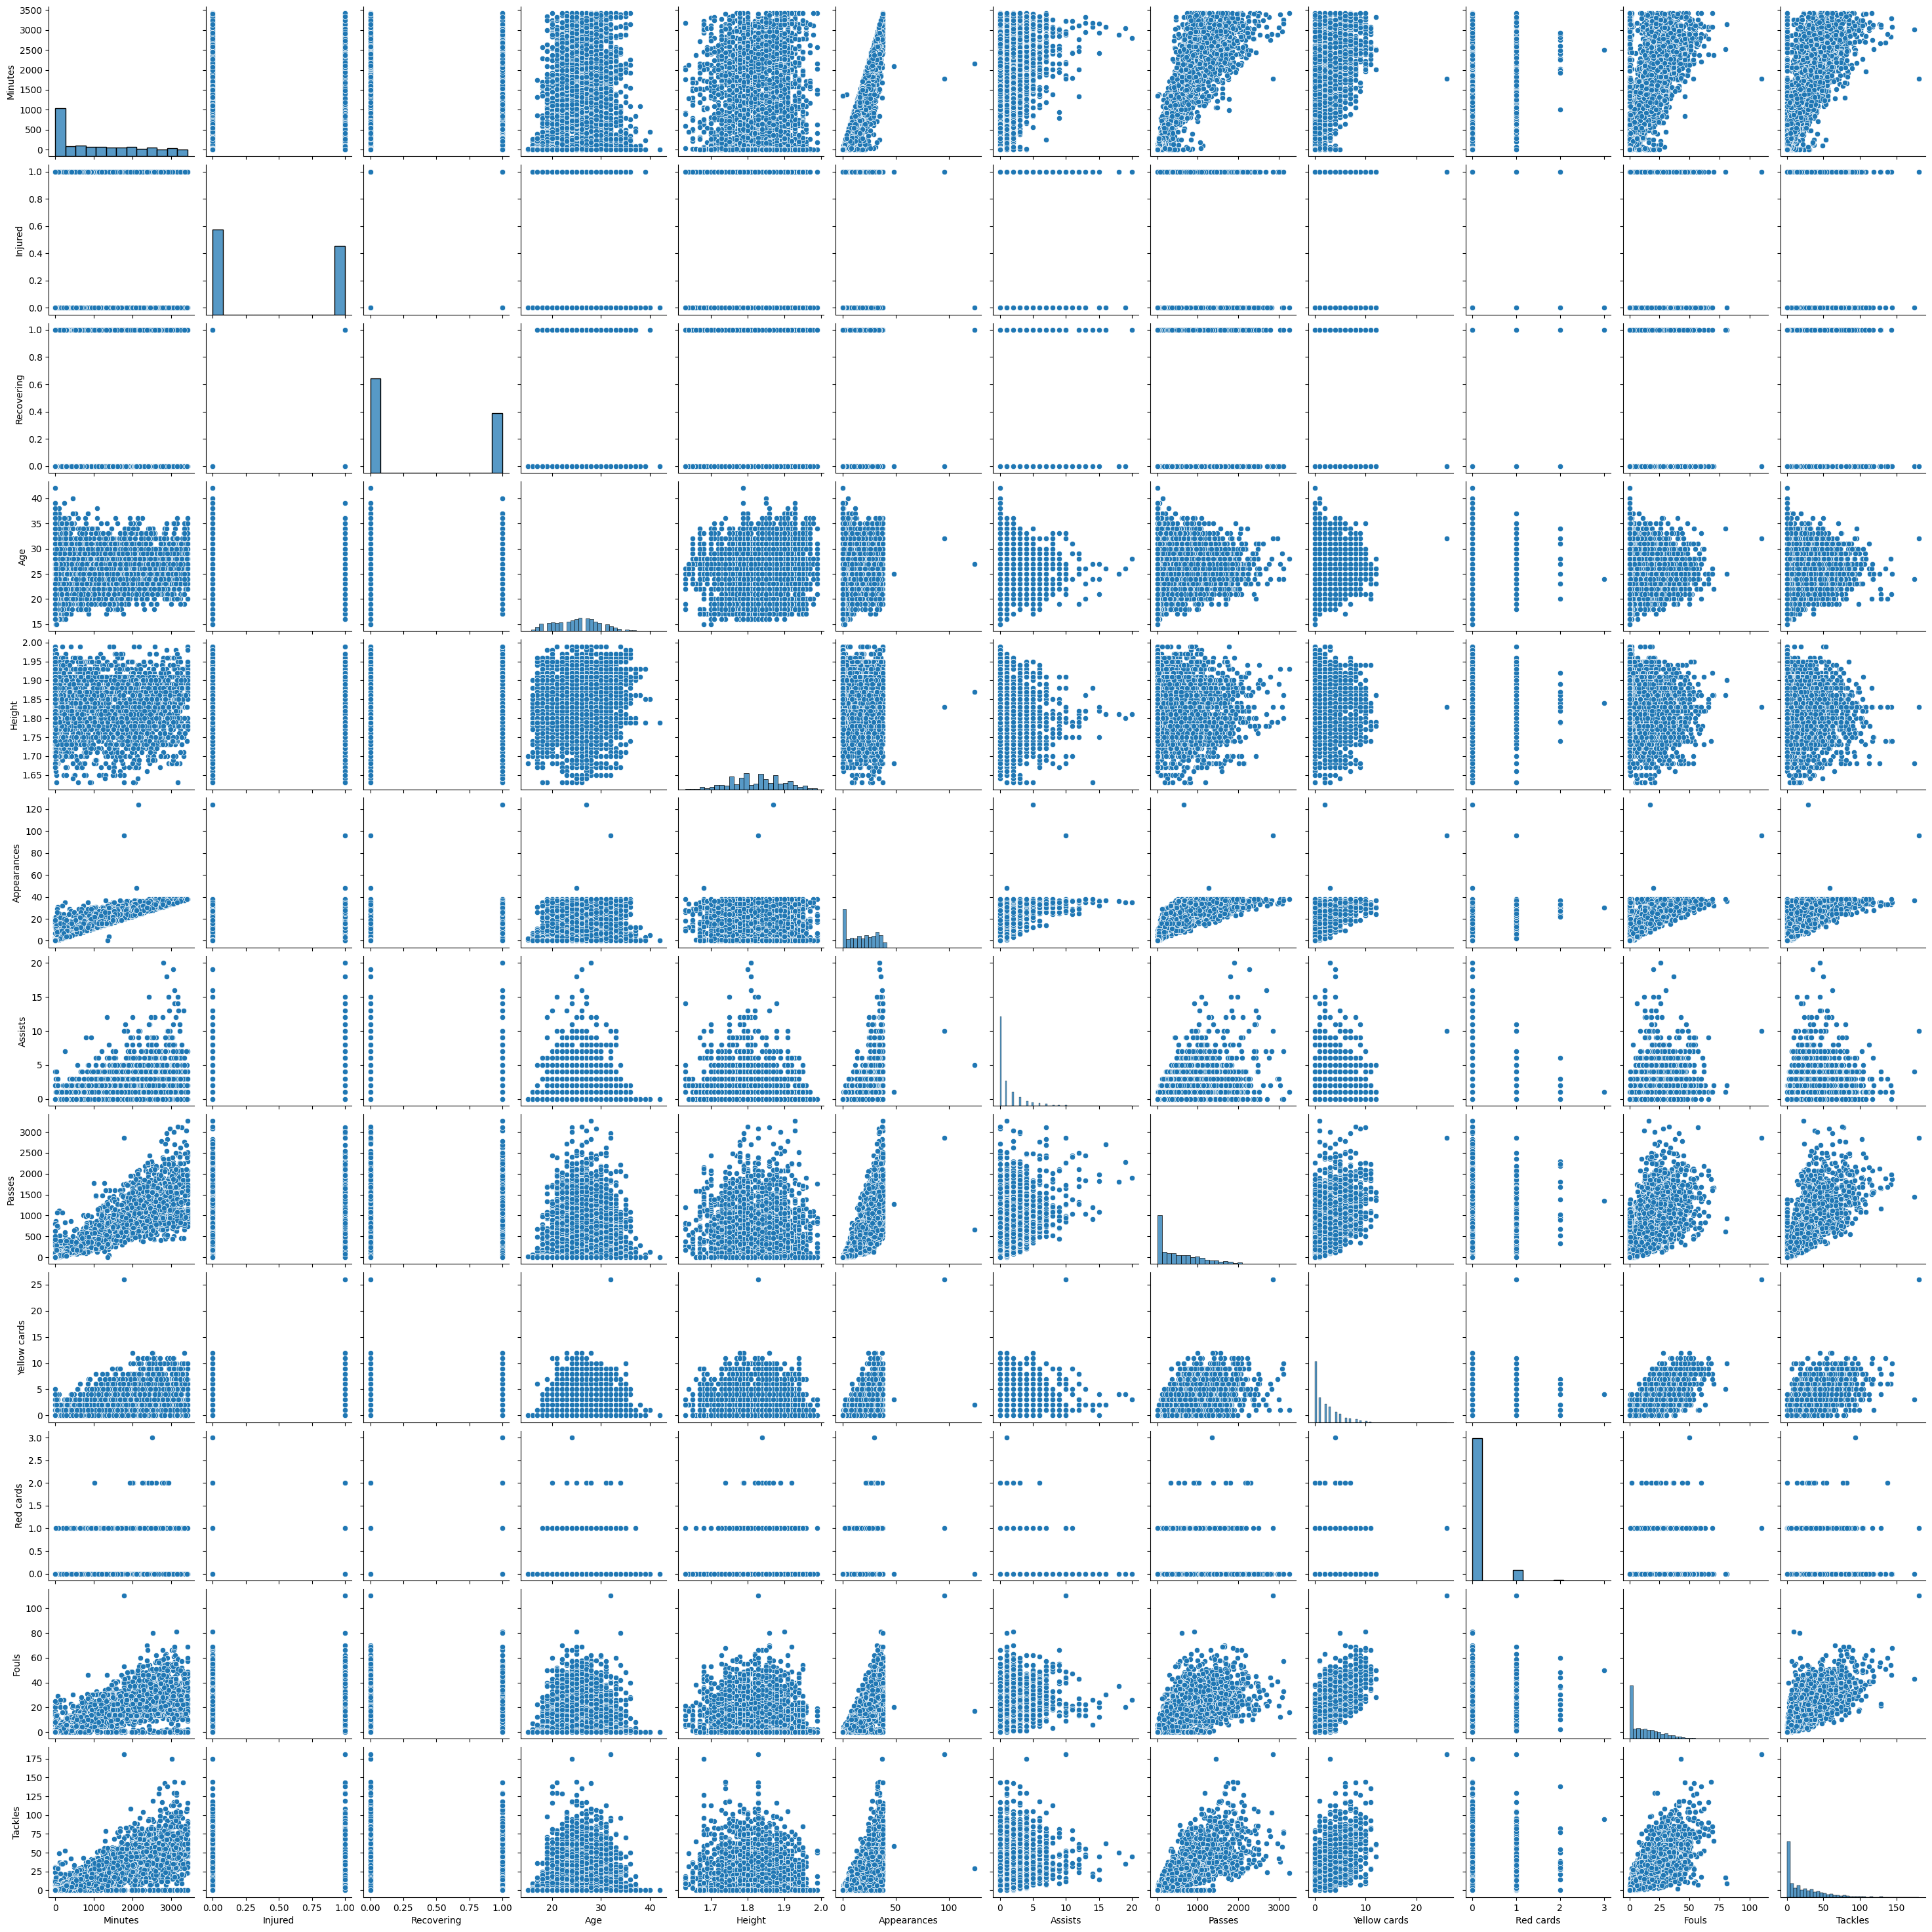

In [ ]:
sns.pairplot(df)

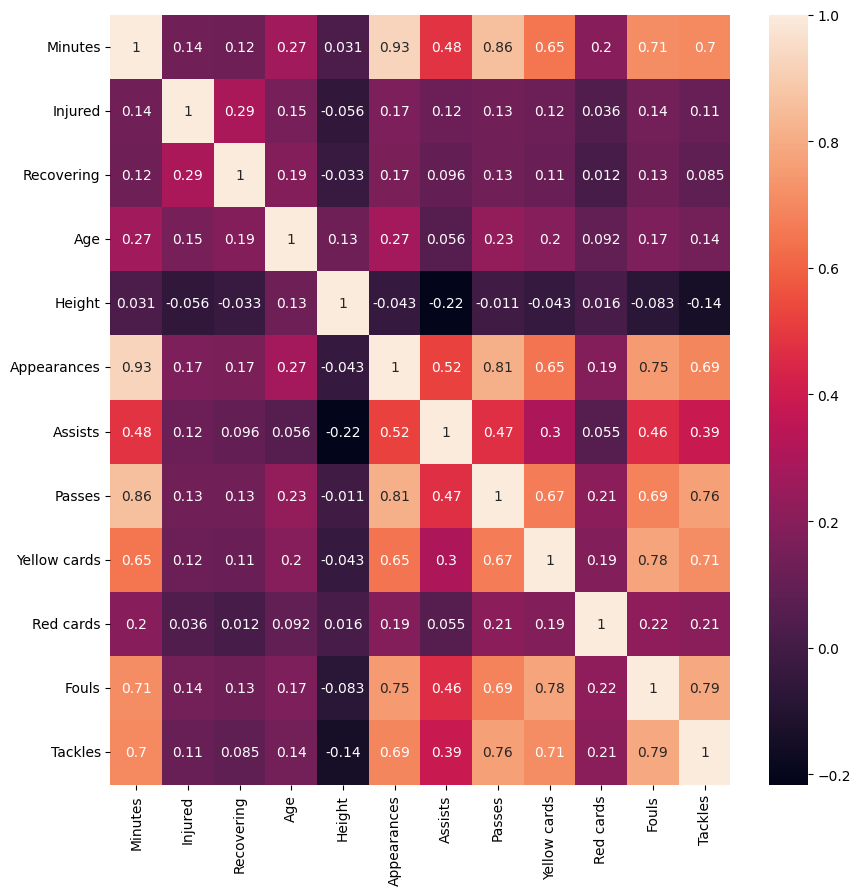

In [ ]:
plt.figure(figsize=(10,10))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)
# save the plot as PNG file
plt.savefig("soccer-dataset-correlation.png", dpi=1200)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_position = LabelEncoder()

In [ ]:
df['Position_n'] = le_position.fit_transform(df['Position'])

In [ ]:
df.loc[df['Name'] == "Adrián"]

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles,Position_n
910,270,0,0,33,1.9,Adrián,Goalkeeper,3,0,80,0,0,0,0,2
911,873,0,0,32,1.9,Adrián,Goalkeeper,11,0,260,1,0,0,0,2
912,0,0,0,31,1.9,Adrián,Goalkeeper,0,0,0,0,0,0,0,2
913,1710,0,0,30,1.9,Adrián,Goalkeeper,19,0,520,2,0,1,0,2
914,1440,0,1,29,1.9,Adrián,Goalkeeper,16,0,417,1,0,0,0,2
915,2880,1,0,28,1.9,Adrián,Goalkeeper,32,0,853,1,1,1,0,2


In [ ]:
df

,Minutes,Injured,Recovering,Age,Height,Name,Position,Appearances,Assists,Passes,Yellow cards,Red cards,Fouls,Tackles,Position_n
0,3150,1,1,25,1.788519,Thibaut Courtois,Goalkeeper,35,0,983,2,0,2,0,2
1,3240,1,1,24,1.788519,Thibaut Courtois,Goalkeeper,36,0,792,1,0,1,0,2
2,2020,1,1,23,1.788519,Thibaut Courtois,Goalkeeper,23,0,523,1,2,2,0,2
3,2160,1,0,31,1.990000,Asmir Begovic,Goalkeeper,24,0,530,0,0,0,0,2
4,3420,0,0,30,1.990000,Asmir Begovic,Goalkeeper,38,0,945,2,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1490,0,0,28,1.750000,Romaine Sawyers,Midfielder,19,0,720,2,0,18,30,3
3258,1192,1,0,28,1.910000,Mbaye Diagne,Forward,16,2,235,2,0,17,4,1
3259,0,0,0,20,1.788519,Cheikh Diaby,Forward,0,0,0,0,0,0,0,1
3260,0,0,0,21,1.850000,Richard Nartey,Defender,0,0,0,0,0,0,0,0


In [ ]:
inputs = df.drop(['Injured', 'Name', 'Position', 'Height', 'Position_n', 'Tackles', 'Red cards', 'Yellow cards', 'Assists', 'Passes', 'Fouls'], axis='columns')
targets = df.drop(['Minutes', 'Name', 'Position', 'Appearances', 'Assists', 'Passes', 'Yellow cards', 'Red cards', 'Fouls', 'Tackles', 'Position_n', 'Recovering', 'Age', 'Height'], axis='columns')
print(inputs.head())
print(targets.head())

   Minutes  Recovering  Age  Appearances
0     3150           1   25           35
1     3240           1   24           36
2     2020           1   23           23
3     2160           0   31           24
4     3420           0   30           38
   Injured
0        1
1        1
2        1
3        1
4        0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = pd.DataFrame(scaler.fit_transform(inputs), columns=inputs.columns)

inputs.head()

,Minutes,Recovering,Age,Appearances
0,0.921053,1.0,0.370370,0.282258
1,0.947368,1.0,0.333333,0.290323
2,0.590643,1.0,0.296296,0.185484
3,0.631579,0.0,0.592593,0.193548
4,1.000000,0.0,0.555556,0.306452


In [ ]:
print(inputs.shape)

(3262, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

in_scaled = scaler.fit_transform(inputs.to_numpy())
in_scaled = pd.DataFrame(in_scaled, columns=inputs.columns)


print("Scaled Dataset Using MinMaxScaler")
inputs = in_scaled
in_scaled.head()

Scaled Dataset Using MinMaxScaler


,Minutes,Recovering,Age,Appearances
0,0.921053,1.0,0.370370,0.282258
1,0.947368,1.0,0.333333,0.290323
2,0.590643,1.0,0.296296,0.185484
3,0.631579,0.0,0.592593,0.193548
4,1.000000,0.0,0.555556,0.306452


In [ ]:
inputs.shape

(3262, 4)

In [ ]:
targets.shape

(3262, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
import xgboost as xgb; print(xgb.__version__)

3.1.1


In [ ]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_curve
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [ ]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
X, y = inputs, targets
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.666 (std: 0.021)
Parameters: {'colsample_bytree': np.float64(0.7516959613604889), 'gamma': np.float64(0.09614450940433539), 'learning_rate': np.float64(0.042260584879943656), 'max_depth': 2, 'n_estimators': 117, 'subsample': np.float64(0.7114361356127834)}



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2)

In [ ]:
params = {'colsample_bytree': 0.7516959613604889, 'gamma': 0.09614450940433539, 'learning_rate': 0.042260584879943656, 'max_depth': 2, 'n_estimators': 117, 'subsample': 0.7114361356127834}
test = xgb.XGBClassifier(parameters = params)
test.fit(X_train, y_train)
test.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:22:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "parameters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.5972434915773354

In [ ]:
confusion_matrix(y_test, test.predict(X_test))

array([[221, 134],
       [129, 169]])

Best iteration: 7


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


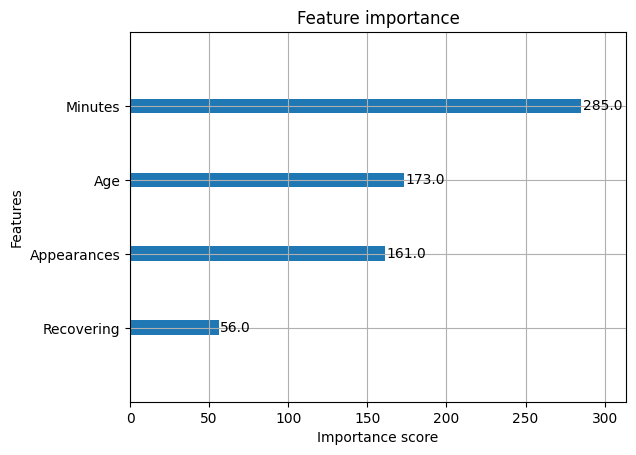

In [ ]:
from xgboost import DMatrix, train

params = {
    "objective": "binary:logistic",
    "eta": 0.2,
    "gamma": 0.2,
    "max_depth": 5,
    "eval_metric": "auc"
}

dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

evals = [(dtrain, "train"), (dtest, "eval")]

booster = train(
    params,
    dtrain,
    num_boost_round=70,
    evals=evals,
    early_stopping_rounds=25,
    verbose_eval=False
)

print("Best iteration:", booster.best_iteration)

# Visualize the best tree
from xgboost import to_graphviz
to_graphviz(booster, num_trees=booster.best_iteration)

from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(booster)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Get raw probability predictions
y_pred_prob = booster.predict(dtest)

# Convert probabilities to binary predictions
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

# Evaluate accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.6355283307810107


In [ ]:
from sklearn.metrics import confusion_matrix

# Use the same y_pred from booster.predict(dtest)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[229 126]
 [112 186]]


In [ ]:
# Use predictions from the trained booster model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Get predicted probabilities
y_pred_prob = booster.predict(dtest)

# Convert to binary predictions
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

# Evaluate using sklearn
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
print(precision_score(y_test, y_pred), ": is the precision score")
print(recall_score(y_test, y_pred), ": is the recall score")
print(f1_score(y_test, y_pred), ": is the f1 score")


[[229 126]
 [112 186]] : is the confusion matrix
0.6355283307810107 : is the accuracy score
0.5961538461538461 : is the precision score
0.6241610738255033 : is the recall score
0.6098360655737705 : is the f1 score


In [ ]:
#y_pred = xgb_model.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[229 126]
 [112 186]] : is the confusion matrix
0.6355283307810107 : is the accuracy score
0.5961538461538461 : is the precision score
0.6241610738255033 : is the recall score
0.6098360655737705 : is the f1 score


Text(95.72222222222221, 0.5, 'True')

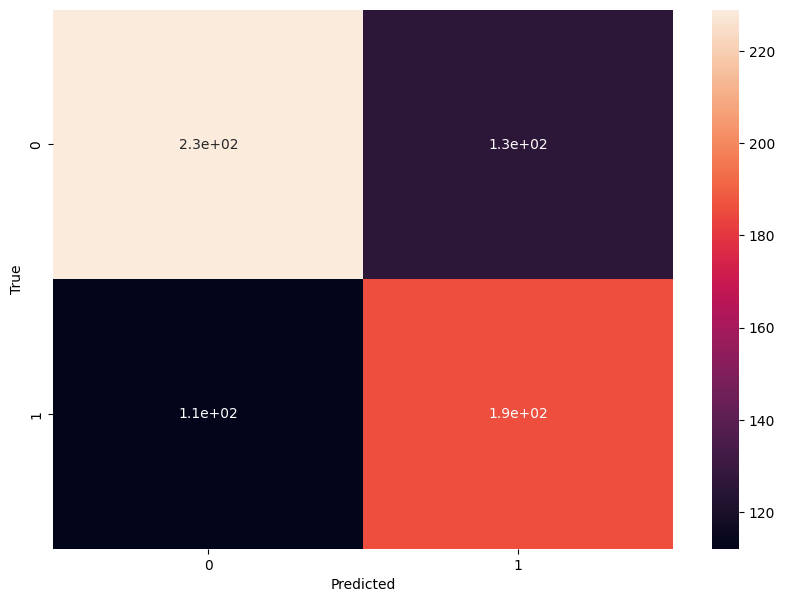

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

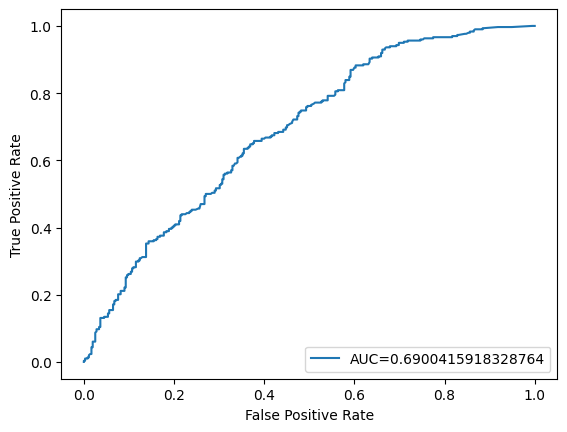

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = booster.predict(dtest)

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_model,X,y,cv=10)
print(score)
print(score.mean(), score.std())

[0.60244648 0.56269113 0.68404908 0.60122699 0.59815951 0.63496933
 0.57361963 0.65030675 0.6809816  0.69018405]
0.6278634547194236 0.04454669965745061


In [ ]:
print(score.mean(), score.std())

0.6278634547194236 0.04454669965745061


In [ ]:
xgb_model2 = xgb.XGBClassifier(objective="binary:logistic", n_estimators=25, random_state=10, eval_metric=["auc", "error", "error@0.6"], max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgb_model2.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.73546	validation_0-error:0.34763	validation_0-error@0.6:0.45789
[1]	validation_0-auc:0.73637	validation_0-error:0.34303	validation_0-error@0.6:0.46095
[2]	validation_0-auc:0.73980	validation_0-error:0.34609	validation_0-error@0.6:0.39663
[3]	validation_0-auc:0.74182	validation_0-error:0.35069	validation_0-error@0.6:0.40276
[4]	validation_0-auc:0.74089	validation_0-error:0.34763	validation_0-error@0.6:0.34609
[5]	validation_0-auc:0.74527	validation_0-error:0.34916	validation_0-error@0.6:0.34456
[6]	validation_0-auc:0.75013	validation_0-error:0.33538	validation_0-error@0.6:0.34763
[7]	validation_0-auc:0.74937	validation_0-error:0.33538	validation_0-error@0.6:0.35375
[8]	validation_0-auc:0.74634	validation_0-error:0.34150	validation_0-error@0.6:0.35375
[9]	validation_0-auc:0.74733	validation_0-error:0.33538	validation_0-error@0.6:0.35222
[10]	validation_0-auc:0.74623	validation_0-error:0.33384	validation_0-error@0.6:0.35681
[11]	validation_0-auc:0.74615	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=['auc', 'error', 'error@0.6'], feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=25,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_model2.score(X_test, y_test)

0.666156202143951

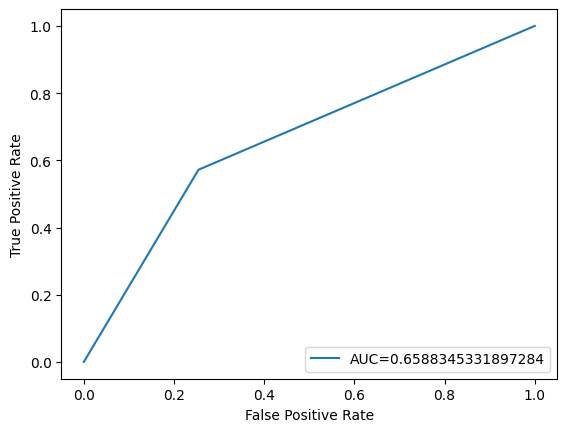

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  xgb_model2.predict(X_test))
auc = metrics.roc_auc_score(y_test, xgb_model2.predict(X_test))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
data_dmatrix = xgb.DMatrix(data=inputs,label=targets)

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 20, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.666 (std: 0.021)
Parameters: {'colsample_bytree': np.float64(0.7516959613604889), 'gamma': np.float64(0.09614450940433539), 'learning_rate': np.float64(0.042260584879943656), 'max_depth': 2, 'n_estimators': 117, 'subsample': np.float64(0.7114361356127834)}



XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [ ]:
pred = xg_reg.predict(X_test)

In [ ]:
xg_reg.score(X_test, y_test)

0.6584992343032159

loop to find best model

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
best = 0
sum_acc = 0
seed = -1
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state = i)
  xg_class = xgb.XGBClassifier(objective ='binary:logistic')
  xg_class.fit(X_train,y_train)
  score = xg_class.score(X_test, y_test)
  sum_acc += score
  if score > best:
    best = score
    seed = i
  print(f"\rSeed {i}/999, Highest accuracy is: {best*100} with a seed of {seed}. Average accuracy is: {sum_acc/(i+1)}", end = "")

Seed 999/999, Highest accuracy is: 69.37212863705973 with a seed of 555. Average accuracy is: 0.6331179173047463

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets)
n_folds = 10
early_stopping = 20
params = {'booster':'gbtree', 'eta': 0.1, 'max_depth': 4, 'objective': 'binary:logistic', 'eval_metric':['auc', 'error'], 'nthread':4}

xg_train = xgb.DMatrix(inputs, label=targets);

cv = xgb.cv(params, xg_train, 500, nfold=n_folds, early_stopping_rounds=early_stopping, verbose_eval=1)

[0]	train-auc:0.73392+0.00219	train-error:0.44666+0.00217	test-auc:0.70974+0.02800	test-error:0.44665+0.01949
[1]	train-auc:0.73881+0.00335	train-error:0.43906+0.02076	test-auc:0.71179+0.02891	test-error:0.44205+0.03182
[2]	train-auc:0.74227+0.00298	train-error:0.34474+0.01622	test-auc:0.71349+0.02873	test-error:0.36297+0.02846
[3]	train-auc:0.74334+0.00298	train-error:0.33166+0.00414	test-auc:0.71602+0.03050	test-error:0.34733+0.02760
[4]	train-auc:0.74632+0.00220	train-error:0.33109+0.00354	test-auc:0.71796+0.02871	test-error:0.34059+0.02628
[5]	train-auc:0.74717+0.00283	train-error:0.33061+0.00342	test-auc:0.71898+0.02792	test-error:0.34059+0.02524
[6]	train-auc:0.74912+0.00264	train-error:0.32856+0.00464	test-auc:0.72076+0.02613	test-error:0.34028+0.02459
[7]	train-auc:0.75145+0.00355	train-error:0.32625+0.00456	test-auc:0.72226+0.02554	test-error:0.34028+0.02576
[8]	train-auc:0.75265+0.00364	train-error:0.32656+0.00443	test-auc:0.72454+0.02556	test-error:0.33906+0.02651
[9]	train-

In [ ]:
cv

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.733924,0.002190,0.446658,0.002165,0.709743,0.028000,0.446648,0.019486
1,0.738805,0.003354,0.439063,0.020759,0.711794,0.028907,0.442045,0.031825
2,0.742271,0.002977,0.344743,0.016220,0.713486,0.028726,0.362973,0.028458
3,0.743338,0.002975,0.331664,0.004144,0.716019,0.030502,0.347327,0.027603
4,0.746325,0.002203,0.331085,0.003542,0.717959,0.028707,0.340590,0.026276
5,0.747167,0.002827,0.330608,0.003417,0.718976,0.027915,0.340589,0.025240
6,0.749124,0.002636,0.328565,0.004636,0.720758,0.026130,0.340283,0.024593
7,0.751449,0.003552,0.326249,0.004557,0.722264,0.025541,0.340282,0.025765
8,0.752648,0.003639,0.326555,0.004434,0.724538,0.025563,0.339056,0.026506
9,0.753343,0.003166,0.324034,0.005077,0.724363,0.026723,0.338441,0.026795


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state=968)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'booster':'gbtree',
          'gamma': 0.4,
          'learning_rate': 0.05,
          'max_depth': 3,
          'min_child_weight': 4,
          'objective': 'binary:logistic',
          'eval_metric':['auc', 'error'],
          'nthread':4}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 200
bst = xgb.train(params, dtrain, num_round, evallist)

[0]	eval-auc:0.72124	eval-error:0.43338	train-auc:0.71326	train-error:0.44998
[1]	eval-auc:0.72124	eval-error:0.43338	train-auc:0.71326	train-error:0.44998
[2]	eval-auc:0.72124	eval-error:0.43338	train-auc:0.71326	train-error:0.44998
[3]	eval-auc:0.72157	eval-error:0.43338	train-auc:0.71336	train-error:0.44998
[4]	eval-auc:0.72157	eval-error:0.43338	train-auc:0.71336	train-error:0.44998
[5]	eval-auc:0.72242	eval-error:0.30015	train-auc:0.71350	train-error:0.34496
[6]	eval-auc:0.72242	eval-error:0.30015	train-auc:0.71350	train-error:0.34496
[7]	eval-auc:0.72855	eval-error:0.30015	train-auc:0.71669	train-error:0.34496
[8]	eval-auc:0.72855	eval-error:0.30015	train-auc:0.71669	train-error:0.34496
[9]	eval-auc:0.73244	eval-error:0.30015	train-auc:0.71834	train-error:0.34496
[10]	eval-auc:0.73237	eval-error:0.30015	train-auc:0.71864	train-error:0.34496
[11]	eval-auc:0.73266	eval-error:0.30015	train-auc:0.71868	train-error:0.34496
[12]	eval-auc:0.73286	eval-error:0.30015	train-auc:0.71895	tra

In [ ]:
from xgboost import cv
data_dmatrix = xgb.DMatrix(data=inputs,label=targets)
bst_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=200, early_stopping_rounds=10, metrics=["auc", "error"], as_pandas=True)
bst_cv

,train-auc-mean,train-auc-std,train-error-mean,train-error-std,test-auc-mean,test-auc-std,test-error-mean,test-error-std
0,0.718467,0.003606,0.446658,0.002165,0.710911,0.030421,0.446648,0.019486
1,0.720527,0.004751,0.446658,0.002165,0.710597,0.030067,0.446648,0.019486
2,0.721703,0.004585,0.446658,0.002165,0.711131,0.030981,0.446648,0.019486
3,0.723824,0.004157,0.446658,0.002165,0.712936,0.031964,0.446648,0.019486
4,0.725045,0.004673,0.405378,0.041613,0.713079,0.032103,0.423335,0.042152
5,0.725266,0.004673,0.342598,0.010899,0.713375,0.032004,0.351325,0.033719
6,0.727679,0.004836,0.337284,0.005580,0.714500,0.032076,0.345192,0.026455
7,0.728676,0.005656,0.334866,0.002900,0.714384,0.031750,0.339671,0.026504
8,0.729294,0.005934,0.334525,0.003341,0.714778,0.031936,0.338444,0.027036
9,0.729503,0.005927,0.334491,0.003660,0.714625,0.030999,0.338444,0.027036


In [ ]:
correct = 0
total = len(y_test)
y_preds = bst.predict(dtest)
act_y_preds = []
for i in range(total):
  pred = y_preds[i]
  act = y_test['Injured'].tolist()[i]
  if pred<=0.5:
    act_y_preds.append(0)
  else:
    act_y_preds.append(1)
  if pred<=0.5 and not act or pred>0.5 and act:
    correct += 1

print(correct/total)

0.7059724349157733


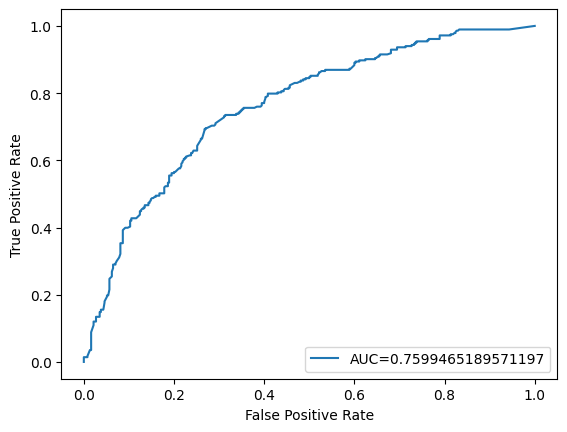

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  bst.predict(dtest))
auc = metrics.roc_auc_score(y_test, bst.predict(dtest))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, act_y_preds), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, act_y_preds), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, act_y_preds), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, act_y_preds), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, act_y_preds), ": is the f1 score")

[[273  97]
 [ 95 188]] : is the confusion matrix
0.7059724349157733 : is the accuracy score
0.6596491228070176 : is the precision score
0.6643109540636042 : is the recall score
0.6619718309859155 : is the f1 score


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
score = cross_val_score(model, inputs, targets, cv=10)
print(score)
print(score.mean(), score.std())


[0.60244648 0.56269113 0.68404908 0.60122699 0.59815951 0.63496933
 0.57361963 0.65030675 0.6809816  0.69018405]
0.6278634547194236 0.04454669965745061


In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
y_test.head()

,Injured
1716,0
513,1
50,0
2440,0
2204,0


In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
y_test.at[1665, 'Injured']

np.int64(1)

In [ ]:
cv

<function xgboost.training.cv(params: Union[List, Dict[str, Any]], dtrain: xgboost.core.DMatrix, num_boost_round: int = 10, *, nfold: int = 3, stratified: bool = False, folds: sklearn.model_selection._split.StratifiedKFold = None, metrics: Sequence[str] = (), obj: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[numpy.ndarray, numpy.ndarray]]] = None, maximize: Optional[bool] = None, early_stopping_rounds: Optional[int] = None, fpreproc: Optional[Callable] = None, as_pandas: bool = True, verbose_eval: Union[bool, int, NoneType] = None, show_stdv: bool = True, seed: int = 0, callbacks: Optional[Sequence[xgboost.callback.TrainingCallback]] = None, shuffle: bool = True, custom_metric: Optional[Callable[[numpy.ndarray, xgboost.core.DMatrix], Tuple[str, float]]] = None) -> Union[Dict[str, float], ForwardRef('PdDataFrame')]>

In [ ]:
# training the model on training set
X_train, X_test, y_train, y_test = train_test_split(inputs, targets)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 65.19607843137256


In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
'''
Fitting 10 folds for each of 100 candidates, totalling 1000 fit
GaussianNB(priors=None, var_smoothing=1.0)
'''

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=np.float64(1.0))


'\nFitting 10 folds for each of 100 candidates, totalling 1000 fit\nGaussianNB(priors=None, var_smoothing=1.0)\n'

In [ ]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0
 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[341 122]
 [155 198]] : is the confusion matrix
0.6605392156862745 : is the accuracy score
0.61875 : is the precision score
0.5609065155807366 : is the recall score
0.5884101040118871 : is the f1 score


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
score = cross_val_score(model, inputs, targets, cv=10)
print(score)
print(score.mean(), score.std())


[0.60244648 0.56269113 0.68404908 0.60122699 0.59815951 0.63496933
 0.57361963 0.65030675 0.6809816  0.69018405]
0.6278634547194236 0.04454669965745061


In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
X, y = inputs, targets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, random_state=968)

In [ ]:
random_search.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [ ]:
params = random_search.best_params_

In [ ]:
classifier = xgboost.XGBClassifier(params = params, objective='binary:logistic')
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [ ]:
score

array([0.60244648, 0.56269113, 0.68404908, 0.60122699, 0.59815951,
       0.63496933, 0.57361963, 0.65030675, 0.6809816 , 0.69018405])

In [ ]:
score.mean()

np.float64(0.6278634547194236)

In [ ]:
score.std()

np.float64(0.04454669965745061)

In [ ]:
classifier.score(X_test, y_test)

0.6580882352941176

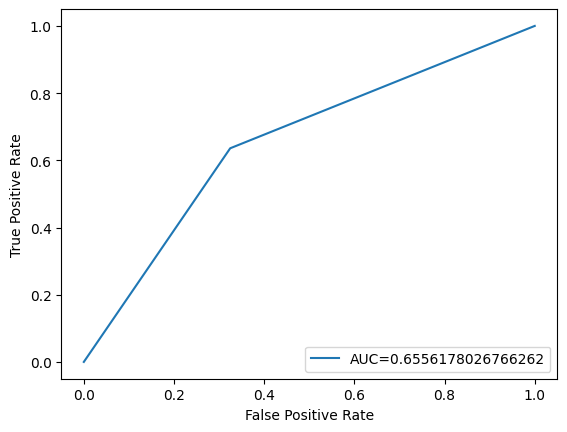

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  classifier.predict(X_test))
auc = metrics.roc_auc_score(y_test, classifier.predict(X_test))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Use final trained versions with correct random_state and hyperparameters
models = {
    'XGBoost': xgb_model,
}

results = []

# Ensure same split for all models
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=968)

for name, model in models.items():
    model.fit(X_train, y_train)

    # Probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    y_pred = model.predict(X_test)

    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    kfold = cross_val_score(model, inputs, targets, cv=10).mean() * 100

    results.append([name, round(auc, 4), round(acc, 2), round(precision, 2),
                    round(recall, 2), round(f1, 2), round(kfold, 2)])

df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy (%)", "Precision", "Recall", "F1", "K-fold"])
print(df.to_string(index=False))


  Model    AUC  Accuracy (%)  Precision  Recall    F1  K-fold
XGBoost 0.6817         63.25      57.39   59.01 58.19   62.79


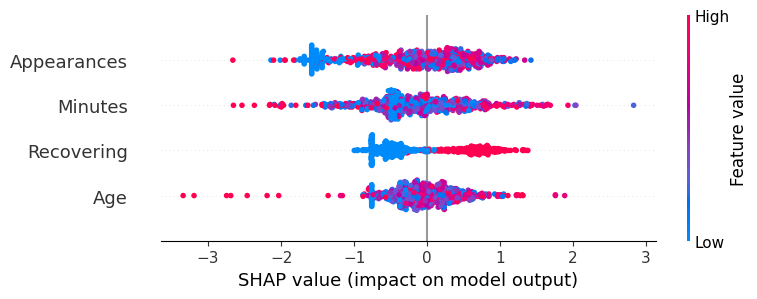

In [ ]:
#SHAP
import shap
import matplotlib.pyplot as plt

xgb_model.fit(X_train, y_train)
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=True)
shap.initjs()

